# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [206]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [207]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

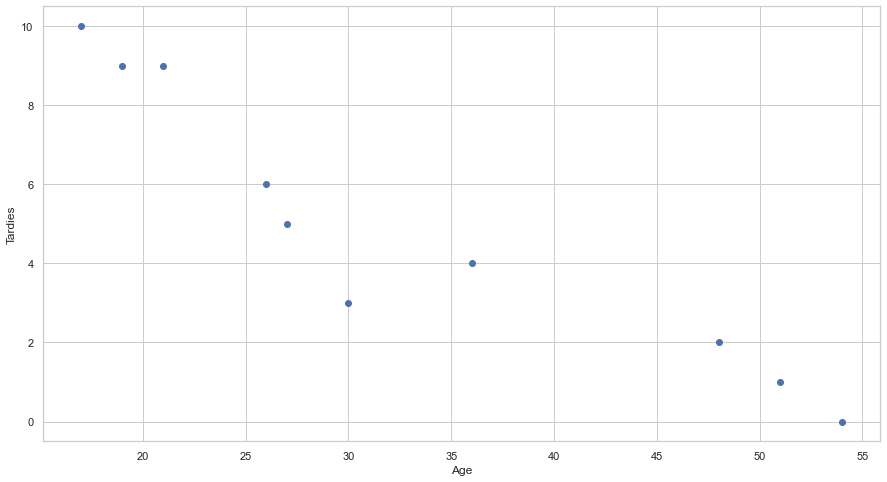

In [208]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'], color= 'b')
plt.xlabel('Age')
plt.ylabel('Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [209]:
# Your response here. 
# There is a negative correlation, older people are less likely to arrive late.
# Younger students arrive late to class more often.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [210]:
# Your response here.
corr = student_data.corr()
corr

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


**Correlation**

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

In [211]:
cov = student_data.cov()
cov

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


**Covariance**

Covariance is a measure of the joint variability of two random variables.

- If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.
- In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative.

The sign of the covariance therefore shows the tendency in the linear relationship between the variables.


- “Covariance” indicates the direction of the **linear relationship between variables**.
- “Correlation” on the other hand measures both the **strength and direction of the linear relationship between two variables**.
- Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not.
- You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [212]:
# Your response here.
lr = LinearRegression ()
X = student_data[['Age']]
y = student_data['Tardies']
lr.fit(X,y)
student_data['predicted_tardies'] = lr.predict(X)
student_data


,Age,Tardies,predicted_tardies
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


In [213]:
beta_0 = lr.intercept_
beta_1 = lr.coef_[0]
print(f"beta_0: {beta_0}, which is the intercept\nbeta_1: {beta_1}, which is the slope or coef_[0]")


beta_0: 12.888803363135768, which is the intercept
beta_1: -0.2428207709159808, which is the slope or coef_[0]


Plot your regression model on your scatter plot.

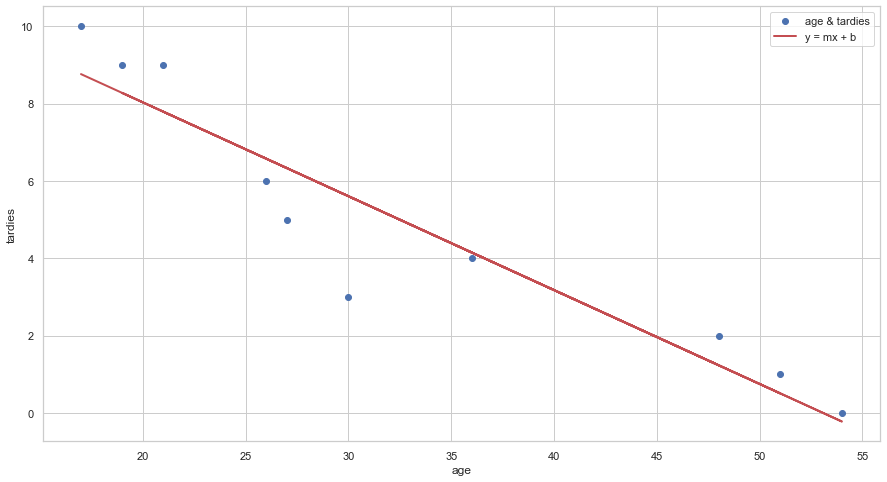

In [214]:
# Your code here.
plt.scatter(X, y, color= 'b', label='age & tardies')
plt.plot(student_data.Age, student_data.predicted_tardies, color= 'r', lw=2, label='y = mx + b')
plt.xlabel('age')
plt.ylabel('tardies')
plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [215]:
# Your response here. 
from sklearn import metrics
r2 = metrics.r2_score(student_data.Tardies, student_data.predicted_tardies)
r2

0.8820265558250109

In [216]:
# Our r-squared is relatively high 0.88 which says that 88% of the variance in tardiness can be explained by age.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [217]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('./vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [218]:
# Your response here.
correlation = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
correlation

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [219]:
correlation.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


- The variables most correlated with CO2 Emissions are Fuel related (Fuel Barrels/Year and Fuel Cost/Year, and Combined MPG - which I'm assuming means Miles Per Gallon) which makes sense and also Cylinders (slightly less).

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [220]:
# Your response here. 
Y = vehicles['CO2 Emission Grams/Mile']
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
lr = LinearRegression()
model = lr.fit(X,Y)

print('Score (r-squared): ', lr.score(X,Y))


Score (r-squared):  0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [221]:
# Your response here. 
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Year,-0.320617
Cylinders,1.878800
Fuel Barrels/Year,19.052925
Combined MPG,-3.040399
Fuel Cost/Year,0.032309


**Conclusions**

- For a unit increase in 'Fuel Barrels/Year', there is an increase of 19.05 units in CO2 emissions.
- A unit increase in 'Cylinders' results in an increase of 1.87 units in CO2 emissions.
- A unit increase in MPG results in a 3.04 units decrease in CO2 emissions.
- The rest of the features have very little effect on CO2 emissions.
- Confidence in these conclusions is high because the model score was 0.98

In [222]:
results = smf.ols("vehicles['CO2 Emission Grams/Mile'] ~ Year + Cylinders + vehicles['Fuel Barrels/Year'] + vehicles['Fuel Cost/Year']", data=correlation).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vehicles['CO2 Emission Grams/Mile']   R-squared:                       0.978
Model:                                             OLS   Adj. R-squared:                  0.978
Method:                                  Least Squares   F-statistic:                 4.022e+05
Date:                                 Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                                         17:57:03   Log-Likelihood:            -1.5412e+05
No. Observations:                                35952   AIC:                         3.083e+05
Df Residuals:                                    35947   BIC:                         3.083e+05
Df Model:                                            4                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       778.5158     20.730     37.556      0.000     737.885     819.146
Year                             -0.3831      0.010    -37.105      0.000      -0.403      -0.363
Cylinders                         2.0361      0.089     22.918      0.000       1.862       2.210
vehicles['Fuel Barrels/Year']    21.2605      0.056    376.565      0.000      21.150      21.371
vehicles['Fuel Cost/Year']        0.0408      0.000     81.636      0.000       0.040       0.042
==============================================================================
Omnibus:                    76663.839   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        388760530.513
Skew:                          18.894   Prob(JB):                         0.00
Kurtosis:                     511.027   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [223]:
# Your code here. 
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]

In [224]:
bonus = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

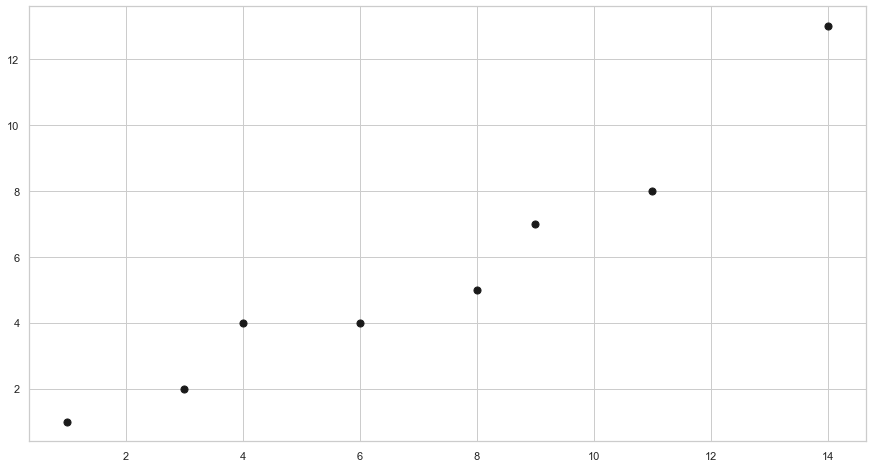

In [225]:
# Your code here.
plt.scatter(X, Y, color='k', s=50)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [226]:
# Your response here. 
lr = LinearRegression()
X = bonus[['X']]
y = bonus['Y']
lr.fit(X,Y)
bonus['predicted_Y'] = lr.predict(X)
bonus

,X,Y,predicted_Y
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


Score (r-squared):  0.9316696375519905
Slope:  [0.84848485]


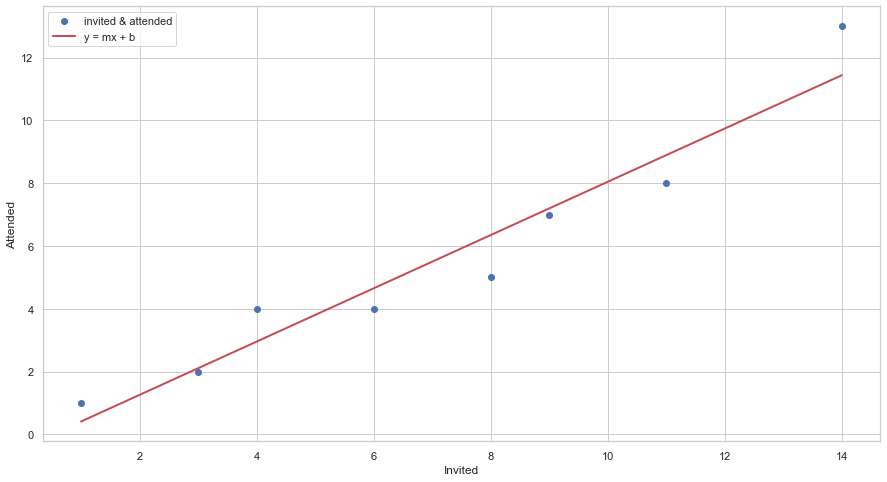

In [227]:
plt.scatter(X, Y, color= 'b', label='invited & attended')
plt.plot(bonus.X, bonus.predicted_Y, color= 'r', lw=2, label='y = mx + b')
plt.xlabel('Invited')
plt.ylabel('Attended')
plt.legend()
print('Score (r-squared): ', lr.score(X,Y))
print('Slope: ', lr.coef_)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Score (r-squared):  0.9433811802232854
Slope:  [0.68421053]


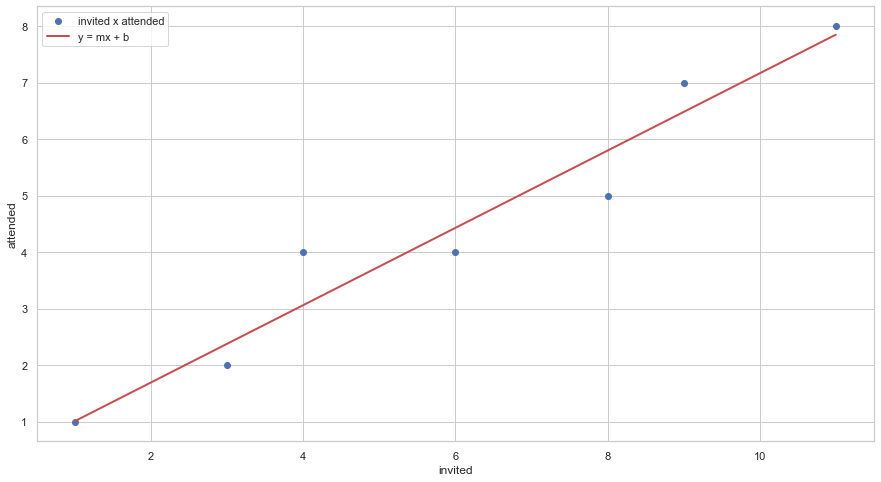

In [228]:
# Your response here. 
X = np.array(X[:-1]).reshape(-1, 1)
Y= Y[:-1]
lr = LinearRegression()
model = lr.fit(X,Y)

print('Score (r-squared): ', lr.score(X,Y))
print('Slope: ', lr.coef_)

plt.scatter(X, Y, label='invited x attended')
plt.plot(X, X*lr.coef_ + lr.intercept_, c='r', lw= 2, label= 'y = mx + b')
plt.xlabel('invited')
plt.ylabel('attended')
plt.legend()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [230]:
# Your response here. 
# The slope of the first model is pretty close to 1 (well kind of at 0.84) which means that almost everyone he invites to the party actually come.
# After removing the outlier we can see that for every person invited only 0.68 people show up.